In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib.request
import requests
import time 
from multiprocessing import Process, Queue, Pool
import threading
import sys
import numpy as np
import re
#from random_user_agent.user_agent import UserAgent
from random_user_agent.params import SoftwareName, OperatingSystem
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
import pandasql as ps
from IPython.display import display,HTML
from datetime import date
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def func_seminuevos(marca):
    path ="/Users/anethenlil/Downloads/chromedriver" # carga del web driver (asignar ruta donde se encuentra el driver)
    driver=webdriver.Chrome(path)
    
    time.sleep(5)
    url="https://www.cars.com/shopping/results/?dealer_id=&keyword="+marca
    driver.get(url) # instruccion de obtener url parametrizada
    time.sleep(10)
    
    productos=driver.find_elements_by_class_name("vehicle-card-main.js-gallery-click-card")
    
    # asignacion de nombres
    lista_nombres=[]
    for i in range(0,len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("vehicle-card-link.js-gallery-click-link")[0].text)
        except:
            lista_nombres.append(np.nan)
            
            
    # asignacion de precios
    lista_precios=[]
    for i in range(0,len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("primary-price")[0].text)
        except:
            lista_precios.append(np.nan)
    
    # asignacion de mensualidad
    lista_mens=[]
    for i in range(0,len(productos)):
        try:
            lista_mens.append(productos[i].find_elements_by_class_name("estimated-monthly-payments-tooltip.js-tooltip-container")[0].text)
        except:
            lista_mens.append(np.nan)
            
    today= date.today()
    
    df_seminuevos =pd.DataFrame(columns=["MODELO","PRECIO","MENSUALIDAD"])
    df_seminuevos["MODELO"] = lista_nombres
    df_seminuevos["PRECIO"] = lista_precios
    df_seminuevos["MENSUALIDAD"] = lista_mens
    df_seminuevos["SITIO"] = "cars.com"
    df_seminuevos["FECHA"] = str(today)
    
    driver.quit()
    
    return df_seminuevos

def func_usados(marca):
    path ="/Users/anethenlil/Downloads/chromedriver" # carga del web driver (asignar ruta donde se encuentra el driver)
    driver=webdriver.Chrome(path)
    
    time.sleep(5)
    url="https://www.miauto.com.mx/autos/seminuevos?page=1&search="+marca
    driver.get(url) # instruccion de obtener url parametrizada
    time.sleep(10)
    
    productos=driver.find_elements_by_class_name("col-list-3")
    
    # asignacion de nombres
    lista_nombres=[]
    for i in range(0,len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("car-item__title")[0].text)
        except:
            lista_nombres.append(np.nan)
            
            
    # asignacion de precios
    lista_precios=[]
    for i in range(0,len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price")[0].text)
        except:
            lista_precios.append(np.nan)
    
    # asignacion de mensualidad
    lista_mens=[]
    for i in range(0,len(productos)):
        try:
            lista_mens.append(productos[i].find_elements_by_class_name("border-left-white")[0].text)
        except:
            lista_mens.append(np.nan)
            
    today= date.today()
    
    df_usados =pd.DataFrame(columns=["MODELO","PRECIO","MENSUALIDAD"])
    df_usados["MODELO"] = lista_nombres
    df_usados["PRECIO"] = lista_precios
    df_usados["MENSUALIDAD"] = lista_mens
    df_usados["SITIO"] = "miauto.com"
    df_usados["FECHA"] = str(today)
    
    driver.quit()
    
    return df_usados

def func_olx(marca):
    path ="/Users/anethenlil/Downloads/chromedriver" # carga del web driver (asignar ruta donde se encuentra el driver)
    driver=webdriver.Chrome(path)
    
    time.sleep(5)
    url="https://www.olxautos.com.mx/autos_c84/q-"+marca
    driver.get(url) # instruccion de obtener url parametrizada
    time.sleep(10)
    
    productos=driver.find_elements_by_class_name("_2n-rb")
    
    # asignacion de nombres
    lista_nombres=[]
    for i in range(0,len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("iNTWC")[0].text)
        except:
            lista_nombres.append(np.nan)
            
            
    # asignacion de precios
    lista_precios=[]
    for i in range(0,len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("_3Ttwu")[0].text)
        except:
            lista_precios.append(np.nan)
    
    # asignacion de mensualidad
    lista_mens=[]
    for i in range(0,len(productos)):
        try:
            lista_mens.append(productos[i].find_elements_by_class_name("_2JCoI")[0].text)
        except:
            lista_mens.append(np.nan)
            
    today= date.today()
    
    df_olx =pd.DataFrame(columns=["MODELO","PRECIO","MENSUALIDAD"])
    df_olx["MODELO"] = lista_nombres
    df_olx["PRECIO"] = lista_precios
    df_olx["MENSUALIDAD"] = lista_mens
    df_olx["SITIO"] = "olxautos.com"
    df_olx["FECHA"] = str(today)
    
    driver.quit()
    
    return df_olx

In [3]:
prod1 = func_seminuevos("honda")
time.sleep(10)
prod1.insert(1,"MARCA",'HONDA')
prod1

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,2020 Honda HR-V Touring,HONDA,"$29,997",$421 est./mo.*,cars.com,2022-12-15
1,2021 Honda Insight Touring,HONDA,"$29,830",$418 est./mo.*,cars.com,2022-12-15
2,2019 Honda Pilot Touring 8-Passenger,HONDA,"$31,044",$435 est./mo.*,cars.com,2022-12-15
3,2017 Honda Accord EX w/Honda Sensing,HONDA,"$22,990",$322 est./mo.*,cars.com,2022-12-15
4,2013 Honda Pilot Touring,HONDA,"$17,833",$250 est./mo.*,cars.com,2022-12-15
5,2019 Honda Odyssey Elite,HONDA,"$38,397",$539 est./mo.*,cars.com,2022-12-15
6,2020 Honda Fit EX,HONDA,"$22,352",$314 est./mo.*,cars.com,2022-12-15
7,2020 Honda Fit EX,HONDA,"$21,323",$299 est./mo.*,cars.com,2022-12-15
8,2022 Honda Civic Sport,HONDA,"$27,513",$386 est./mo.*,cars.com,2022-12-15
9,2022 Honda Civic Sport,HONDA,"$26,794",$376 est./mo.*,cars.com,2022-12-15


In [4]:
prod2 = func_seminuevos("nissan")
time.sleep(10)
prod2.insert(1,"MARCA",'NISSAN')
prod2

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,2013 Nissan Rogue SL,NISSAN,"$9,859",$138 est./mo.*,cars.com,2022-12-15
1,2023 Nissan Rogue SL,NISSAN,"$39,125",$549 est./mo.*,cars.com,2022-12-15
2,2023 Nissan Murano SL,NISSAN,Not Priced,,cars.com,2022-12-15
3,2012 Nissan Armada SV,NISSAN,"$11,400",$160 est./mo.*,cars.com,2022-12-15
4,2023 Nissan Frontier PRO-4X,NISSAN,"$45,025",$632 est./mo.*,cars.com,2022-12-15
5,2010 Nissan Altima 2.5 S,NISSAN,"$12,833",$180 est./mo.*,cars.com,2022-12-15
6,2020 Nissan Sentra SV,NISSAN,"$21,990",$308 est./mo.*,cars.com,2022-12-15
7,2021 Nissan Kicks SV,NISSAN,"$23,490",$329 est./mo.*,cars.com,2022-12-15
8,2018 Nissan Altima 2.5 SR,NISSAN,"$20,699",$290 est./mo.*,cars.com,2022-12-15
9,2020 Nissan Sentra SV,NISSAN,"$22,790",$320 est./mo.*,cars.com,2022-12-15


In [5]:
prod3 = func_seminuevos("ford")
time.sleep(10)
prod3.insert(1,"MARCA",'FORD')
prod3

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,2023 Ford F-150 Lightning LARIAT,FORD,"$87,594","$1,229 est./mo.*",cars.com,2022-12-15
1,2022 Ford Escape SEL,FORD,"$41,625",$584 est./mo.*,cars.com,2022-12-15
2,2022 Ford Escape SEL,FORD,"$39,905",$560 est./mo.*,cars.com,2022-12-15
3,2022 Ford Escape SEL,FORD,"$38,974",$547 est./mo.*,cars.com,2022-12-15
4,2022 Ford F-150 Tremor,FORD,"$77,290","$1,084 est./mo.*",cars.com,2022-12-15
5,2022 Ford F-150 Lightning LARIAT,FORD,"$89,950","$1,262 est./mo.*",cars.com,2022-12-15
6,2020 Ford Escape SE,FORD,"$23,977",$336 est./mo.*,cars.com,2022-12-15
7,2020 Ford Escape SE,FORD,"$26,577",$373 est./mo.*,cars.com,2022-12-15
8,2022 Ford F-150 Raptor,FORD,"$104,490","$1,466 est./mo.*",cars.com,2022-12-15
9,2020 Ford Escape SE,FORD,"$26,577",$373 est./mo.*,cars.com,2022-12-15


In [6]:
df_seminuevos_final = pd.concat([prod1,prod2,prod3])
df_seminuevos_final = df_seminuevos_final[df_seminuevos_final.MENSUALIDAD!=""]

In [7]:
df_seminuevos_final.PRECIO = df_seminuevos_final.PRECIO.str.replace(",","")
df_seminuevos_final.PRECIO = df_seminuevos_final.PRECIO.str.replace("$","")
df_seminuevos_final.PRECIO = df_seminuevos_final.PRECIO.str.replace(".","")

/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/846054654.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_seminuevos_final.PRECIO = df_seminuevos_final.PRECIO.str.replace("$","")
/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/846054654.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_seminuevos_final.PRECIO = df_seminuevos_final.PRECIO.str.replace(".","")


In [8]:
df_seminuevos_final.PRECIO = df_seminuevos_final.PRECIO.astype(float) # cast de datos
df_seminuevos_final.PRECIO = df_seminuevos_final.PRECIO*(19.53) #convertir de usd a mxn

In [9]:
df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.str.replace("/","")
df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.str.replace("mo","")
df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.str.replace("est","")
df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.str.replace("*","")
df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.str.replace(",","")
df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.str.replace("$","")
df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.str.replace(".","")

/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/1914733023.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.str.replace("*","")
/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/1914733023.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.str.replace("$","")
/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/1914733023.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as liter

In [10]:
df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD.astype(float) # cast de datos
df_seminuevos_final.MENSUALIDAD = df_seminuevos_final.MENSUALIDAD*(19.53) #convertir de usd a mxn

In [11]:
df_seminuevos_final

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,2020 Honda HR-V Touring,HONDA,585841.41,8222.13,cars.com,2022-12-15
1,2021 Honda Insight Touring,HONDA,582579.90,8163.54,cars.com,2022-12-15
2,2019 Honda Pilot Touring 8-Passenger,HONDA,606289.32,8495.55,cars.com,2022-12-15
3,2017 Honda Accord EX w/Honda Sensing,HONDA,448994.70,6288.66,cars.com,2022-12-15
4,2013 Honda Pilot Touring,HONDA,348278.49,4882.50,cars.com,2022-12-15
5,2019 Honda Odyssey Elite,HONDA,749893.41,10526.67,cars.com,2022-12-15
6,2020 Honda Fit EX,HONDA,436534.56,6132.42,cars.com,2022-12-15
7,2020 Honda Fit EX,HONDA,416438.19,5839.47,cars.com,2022-12-15
8,2022 Honda Civic Sport,HONDA,537328.89,7538.58,cars.com,2022-12-15
9,2022 Honda Civic Sport,HONDA,523286.82,7343.28,cars.com,2022-12-15


In [12]:
prod4 = func_usados("honda")
time.sleep(10)
prod4.insert(1,"MARCA",'HONDA')
prod4
##EN ESTE SITIO NO CONTENIA LOS MODELOS DE LOS AUTOS

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,NaN,HONDA,"$369,000","$8,206",miauto.com,2022-12-15
1,NaN,HONDA,"$569,000",NaN,miauto.com,2022-12-15
2,NaN,HONDA,"$515,000","$11,453",miauto.com,2022-12-15
3,NaN,HONDA,"$429,900","$9,561",miauto.com,2022-12-15
4,NaN,HONDA,"$369,000","$7,287",miauto.com,2022-12-15
5,NaN,HONDA,"$325,000","$7,228",miauto.com,2022-12-15
6,NaN,HONDA,"$290,000","$10,417",miauto.com,2022-12-15
7,NaN,HONDA,"$339,990","$7,561",miauto.com,2022-12-15
8,NaN,HONDA,"$332,000","$5,538",miauto.com,2022-12-15
9,NaN,HONDA,"$320,000","$6,319",miauto.com,2022-12-15


In [14]:
prod5 = func_usados("nissan")
time.sleep(10)
prod5.insert(1,"MARCA",'NISSAN')
prod5

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,NaN,NISSAN,"$340,000","$5,671",miauto.com,2022-12-15
1,NaN,NISSAN,"$309,900","$6,120",miauto.com,2022-12-15
2,NaN,NISSAN,"$439,000","$9,763",miauto.com,2022-12-15
3,NaN,NISSAN,"$349,900","$7,782",miauto.com,2022-12-15
4,NaN,NISSAN,"$365,000","$8,117",miauto.com,2022-12-15
5,NaN,NISSAN,"$199,990","$3,949",miauto.com,2022-12-15
6,NaN,NISSAN,"$219,000","$4,870",miauto.com,2022-12-15
7,NaN,NISSAN,"$568,000","$12,632",miauto.com,2022-12-15
8,NaN,NISSAN,"$549,000","$12,209",miauto.com,2022-12-15
9,NaN,NISSAN,"$265,000","$5,893",miauto.com,2022-12-15


In [15]:
prod6 = func_usados("ford")
time.sleep(10)
prod6.insert(1,"MARCA",'FORD')
prod6
##EN ESTE SITIO NO CONTENIA LOS MODELOS DE LOS AUTOS

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,NaN,FORD,"$349,000","$7,762",miauto.com,2022-12-15
1,NaN,FORD,"$491,000","$8,190",miauto.com,2022-12-15
2,NaN,FORD,"$490,000","$8,173",miauto.com,2022-12-15
3,NaN,FORD,"$305,000","$6,023",miauto.com,2022-12-15
4,NaN,FORD,"$255,000","$5,671",miauto.com,2022-12-15
5,NaN,FORD,"$999,990","$22,239",miauto.com,2022-12-15
6,NaN,FORD,"$589,000","$13,099",miauto.com,2022-12-15
7,NaN,FORD,"$480,000","$10,675",miauto.com,2022-12-15
8,NaN,FORD,"$480,000","$10,675",miauto.com,2022-12-15
9,NaN,FORD,"$498,000","$11,075",miauto.com,2022-12-15


In [16]:
df_usados_final = pd.concat([prod4,prod5,prod6])
df_usados_final = df_usados_final[df_usados_final.MODELO!=""]

In [17]:
df_usados_final.PRECIO = df_usados_final.PRECIO.str.replace(",","")
df_usados_final.PRECIO = df_usados_final.PRECIO.str.replace("$","")
df_usados_final.PRECIO = df_usados_final.PRECIO.str.replace(".","")
df_usados_final.MENSUALIDAD = df_usados_final.MENSUALIDAD.str.replace(",","")
df_usados_final.MENSUALIDAD = df_usados_final.MENSUALIDAD.str.replace("$","")
df_usados_final.MENSUALIDAD = df_usados_final.MENSUALIDAD.str.replace(".","")

/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/1258688353.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_usados_final.PRECIO = df_usados_final.PRECIO.str.replace("$","")
/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/1258688353.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_usados_final.PRECIO = df_usados_final.PRECIO.str.replace(".","")
/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/1258688353.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_usa

In [18]:
df_usados_final.PRECIO = df_usados_final.PRECIO.astype(float) # cast de datos
df_usados_final.MENSUALIDAD = df_usados_final.MENSUALIDAD.astype(float) # cast de datos

In [19]:
df_usados_final

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,NaN,HONDA,369000.0,8206.0,miauto.com,2022-12-15
1,NaN,HONDA,569000.0,NaN,miauto.com,2022-12-15
2,NaN,HONDA,515000.0,11453.0,miauto.com,2022-12-15
3,NaN,HONDA,429900.0,9561.0,miauto.com,2022-12-15
4,NaN,HONDA,369000.0,7287.0,miauto.com,2022-12-15
5,NaN,HONDA,325000.0,7228.0,miauto.com,2022-12-15
6,NaN,HONDA,290000.0,10417.0,miauto.com,2022-12-15
7,NaN,HONDA,339990.0,7561.0,miauto.com,2022-12-15
8,NaN,HONDA,332000.0,5538.0,miauto.com,2022-12-15
9,NaN,HONDA,320000.0,6319.0,miauto.com,2022-12-15


In [20]:
prod7 = func_olx("honda")
time.sleep(10)
prod7.insert(1,"MARCA",'HONDA')
prod7

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,"2017, Honda Fit",HONDA,"$ 254,000","Mensualidad $ 4,941",olxautos.com,2022-12-15
1,"2022, Honda Insight",HONDA,"$ 592,000","Mensualidad $ 11,517",olxautos.com,2022-12-15
2,"2018, Honda Pilot",HONDA,"$ 573,000","Mensualidad $ 11,147",olxautos.com,2022-12-15
3,"2017, Honda City",HONDA,"$ 231,000","Mensualidad $ 4,494",olxautos.com,2022-12-15
4,"2017, Honda Civic",HONDA,"$ 294,000","Mensualidad $ 5,720",olxautos.com,2022-12-15
5,"2019, Honda Civic",HONDA,"$ 458,000","Mensualidad $ 8,910",olxautos.com,2022-12-15
6,"2019, Honda Civic",HONDA,"$ 440,000","Mensualidad $ 8,560",olxautos.com,2022-12-15
7,"2017, Honda HR-V",HONDA,"$ 331,000","Mensualidad $ 6,439",olxautos.com,2022-12-15
8,"2018, Honda HR-V",HONDA,"$ 354,000","Mensualidad $ 6,887",olxautos.com,2022-12-15
9,"2018, Honda City",HONDA,"$ 259,000","Mensualidad $ 5,039",olxautos.com,2022-12-15


In [21]:
prod8 = func_olx("nissan")
time.sleep(10)
prod8.insert(1,"MARCA",'NISSAN')
prod8

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,"2017, Nissan Sentra",NISSAN,"$ 238,532","Mensualidad $ 4,641",olxautos.com,2022-12-15
1,"2019, Nissan X-Trail",NISSAN,"$ 469,000","Mensualidad $ 9,124",olxautos.com,2022-12-15
2,"2018, Nissan Kicks",NISSAN,"$ 319,000","Mensualidad $ 6,206",olxautos.com,2022-12-15
3,"2021, Nissan Kicks",NISSAN,"$ 356,000","Mensualidad $ 6,926",olxautos.com,2022-12-15
4,"2020, Nissan Versa",NISSAN,"$ 321,000","Mensualidad $ 6,245",olxautos.com,2022-12-15
5,"2020, Nissan Sentra",NISSAN,"$ 361,000","Mensualidad $ 7,023",olxautos.com,2022-12-15
6,"2019, Nissan X-Trail",NISSAN,"$ 430,000","Mensualidad $ 8,365",olxautos.com,2022-12-15
7,"2020, Nissan March",NISSAN,"$ 226,000","Mensualidad $ 4,397",olxautos.com,2022-12-15
8,"2020, Nissan Kicks",NISSAN,"$ 379,000","Mensualidad $ 7,373",olxautos.com,2022-12-15
9,"2017, Nissan Sentra",NISSAN,"$ 221,000","Mensualidad $ 4,299",olxautos.com,2022-12-15


In [22]:
prod9 = func_olx("ford")
time.sleep(10)
prod9.insert(1,"MARCA",'FORD')
prod9

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,"2018, Ford Escape",FORD,"$ 362,000","Mensualidad $ 7,043",olxautos.com,2022-12-15
1,"2020, Ford Figo",FORD,"$ 232,000","Mensualidad $ 4,513",olxautos.com,2022-12-15
2,"2019, Ford Edge",FORD,"$ 573,000","Mensualidad $ 11,147",olxautos.com,2022-12-15
3,"2019, Ford Edge",FORD,"$ 573,000","Mensualidad $ 11,147",olxautos.com,2022-12-15
4,"2020, KIA Forte",FORD,"$ 359,000","Mensualidad $ 6,984",olxautos.com,2022-12-15
5,"2020, KIA Forte",FORD,"$ 407,000","Mensualidad $ 7,918",olxautos.com,2022-12-15
6,"2017, Ford Figo",FORD,"$ 181,000","Mensualidad $ 3,521",olxautos.com,2022-12-15
7,"2017, KIA Forte",FORD,"$ 263,000","Mensualidad $ 5,117",olxautos.com,2022-12-15
8,"2019, KIA Forte",FORD,"$ 380,000","Mensualidad $ 7,393",olxautos.com,2022-12-15
9,"2018, Ford Escape",FORD,"$ 317,573","Mensualidad $ 6,178",olxautos.com,2022-12-15


In [23]:
df_olx_final = pd.concat([prod7,prod8,prod9])
df_olx_final = df_olx_final[df_olx_final.MODELO!=""]

In [24]:
df_olx_final.PRECIO = df_olx_final.PRECIO.str.replace(",","")
df_olx_final.PRECIO = df_olx_final.PRECIO.str.replace("$","")
df_olx_final.PRECIO = df_olx_final.PRECIO.str.replace(".","")
df_olx_final.MENSUALIDAD = df_olx_final.MENSUALIDAD.str.replace(",","")
df_olx_final.MENSUALIDAD = df_olx_final.MENSUALIDAD.str.replace("$","")
df_olx_final.MENSUALIDAD = df_olx_final.MENSUALIDAD.str.replace(".","")
df_olx_final.MENSUALIDAD = df_olx_final.MENSUALIDAD.str.replace("Mensualidad","")

/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/554184922.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_olx_final.PRECIO = df_olx_final.PRECIO.str.replace("$","")
/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/554184922.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_olx_final.PRECIO = df_olx_final.PRECIO.str.replace(".","")
/var/folders/hy/jvcdclh95hg5vt1tl7tyx31m0000gn/T/ipykernel_42834/554184922.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_olx_final.MENSUALI

In [25]:
df_olx_final.PRECIO = df_olx_final.PRECIO.astype(float) # cast de datos
df_olx_final.MENSUALIDAD = df_olx_final.MENSUALIDAD.astype(float) # cast de datos

In [26]:
df_olx_final

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,"2017, Honda Fit",HONDA,254000.0,4941.0,olxautos.com,2022-12-15
1,"2022, Honda Insight",HONDA,592000.0,11517.0,olxautos.com,2022-12-15
2,"2018, Honda Pilot",HONDA,573000.0,11147.0,olxautos.com,2022-12-15
3,"2017, Honda City",HONDA,231000.0,4494.0,olxautos.com,2022-12-15
4,"2017, Honda Civic",HONDA,294000.0,5720.0,olxautos.com,2022-12-15
...,...,...,...,...,...,...
35,"2019, KIA Forte",FORD,323000.0,6284.0,olxautos.com,2022-12-15
36,"2017, Ford EcoSport",FORD,275000.0,5350.0,olxautos.com,2022-12-15
37,"2020, Ford EcoSport",FORD,380000.0,7393.0,olxautos.com,2022-12-15
38,"2021, Ford ford-bronco",FORD,740000.0,14396.0,olxautos.com,2022-12-15


In [27]:
df_tabla_final = pd.concat([df_seminuevos_final,df_usados_final,df_olx_final])

In [28]:
df_tabla_final

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,2020 Honda HR-V Touring,HONDA,585841.41,8222.13,cars.com,2022-12-15
1,2021 Honda Insight Touring,HONDA,582579.90,8163.54,cars.com,2022-12-15
2,2019 Honda Pilot Touring 8-Passenger,HONDA,606289.32,8495.55,cars.com,2022-12-15
3,2017 Honda Accord EX w/Honda Sensing,HONDA,448994.70,6288.66,cars.com,2022-12-15
4,2013 Honda Pilot Touring,HONDA,348278.49,4882.50,cars.com,2022-12-15
...,...,...,...,...,...,...
35,"2019, KIA Forte",FORD,323000.00,6284.00,olxautos.com,2022-12-15
36,"2017, Ford EcoSport",FORD,275000.00,5350.00,olxautos.com,2022-12-15
37,"2020, Ford EcoSport",FORD,380000.00,7393.00,olxautos.com,2022-12-15
38,"2021, Ford ford-bronco",FORD,740000.00,14396.00,olxautos.com,2022-12-15


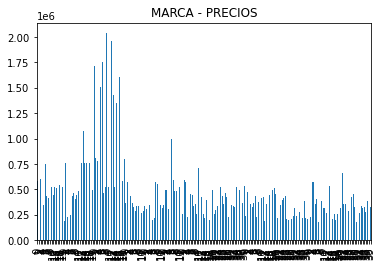

In [29]:
df_tabla_final.PRECIO.plot(kind='bar', alpha=1) #gráfica que muestra la tendencia de los precios 
plt.title('MARCA - PRECIOS')
plt.show()

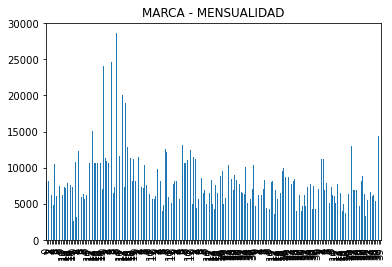

In [30]:
df_tabla_final.MENSUALIDAD.plot(kind='bar', alpha=1) #gráfica que muestra la tendencia de las mensualidades 
plt.title('MARCA - MENSUALIDAD')
plt.show()

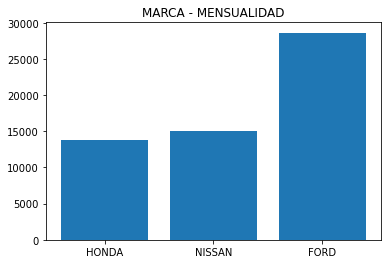

In [31]:
plt.bar(df_tabla_final['MARCA'],df_tabla_final['MENSUALIDAD']) #gráfica que muestra la tendencia de las mensualidades
plt.title('MARCA - MENSUALIDAD')
plt.show()

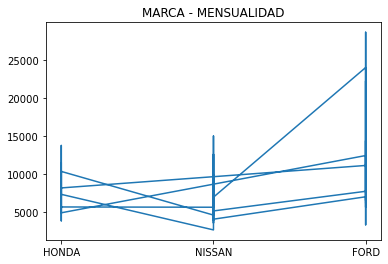

In [32]:
plt.plot(df_tabla_final['MARCA'],df_tabla_final['MENSUALIDAD']) #gráfica que muestra la tendencia de las mensualidades
plt.title('MARCA - MENSUALIDAD')
plt.show()

In [33]:
df_tabla_final.to_excel("df_tabla_final.xlsx",index=False)

In [34]:
#CONSULTAS SQL

In [35]:
ps.sqldf("SELECT (MARCA) FROM df_olx_final") #1

,MARCA
0,HONDA
1,HONDA
2,HONDA
3,HONDA
4,HONDA
...,...
115,FORD
116,FORD
117,FORD
118,FORD


In [36]:
ps.sqldf("SELECT * FROM df_olx_final where PRECIO>500000") #2

,MODELO,MARCA,PRECIO,MENSUALIDAD,SITIO,FECHA
0,"2022, Honda Insight",HONDA,592000.0,11517.0,olxautos.com,2022-12-15
1,"2018, Honda Pilot",HONDA,573000.0,11147.0,olxautos.com,2022-12-15
2,"2018, Honda Odyssey",HONDA,708000.0,13774.0,olxautos.com,2022-12-15
3,"2019, Honda Insight",HONDA,534000.0,10389.0,olxautos.com,2022-12-15
4,"2019, Honda CR-V",HONDA,518000.0,10077.0,olxautos.com,2022-12-15
5,"2019, Honda CR-V",HONDA,518000.0,10077.0,olxautos.com,2022-12-15
6,"2019, Honda CR-V",HONDA,533000.0,10369.0,olxautos.com,2022-12-15
7,"2019, Nissan X-Trail",NISSAN,513530.0,9990.0,olxautos.com,2022-12-15
8,"2019, Ford Edge",FORD,573000.0,11147.0,olxautos.com,2022-12-15
9,"2019, Ford Edge",FORD,573000.0,11147.0,olxautos.com,2022-12-15


In [37]:
ps.sqldf("SELECT (MODELO),(PRECIO) FROM df_tabla_final where PRECIO between 300000 and 500000") #3

,MODELO,PRECIO
0,2017 Honda Accord EX w/Honda Sensing,448994.70
1,2013 Honda Pilot Touring,348278.49
2,2020 Honda Fit EX,436534.56
3,2020 Honda Fit EX,416438.19
4,2020 Honda Civic LX,440303.85
...,...,...
94,"2018, Ford EcoSport",340000.00
95,"2018, Ford EcoSport",316000.00
96,"2019, KIA Forte",323000.00
97,"2020, Ford EcoSport",380000.00


In [38]:
ps.sqldf("SELECT (MODELO),(PRECIO) FROM df_tabla_final where MARCA ='HONDA'") #4

,MODELO,PRECIO
0,2020 Honda HR-V Touring,585841.41
1,2021 Honda Insight Touring,582579.90
2,2019 Honda Pilot Touring 8-Passenger,606289.32
3,2017 Honda Accord EX w/Honda Sensing,448994.70
4,2013 Honda Pilot Touring,348278.49
...,...,...
64,"2019, Honda Fit",260000.00
65,"2018, Honda CR-V",491000.00
66,"2019, Honda Fit",292000.00
67,"2016, Honda CR-V",365000.00


In [39]:
ps.sqldf("SELECT count(MODELO) FROM df_tabla_final where MARCA='FORD'") #5

,count(MODELO)
0,60


In [40]:
ps.sqldf("SELECT (MARCA) FROM df_tabla_final where SITIO!='cars.com'") #6

,MARCA
0,HONDA
1,HONDA
2,HONDA
3,HONDA
4,HONDA
...,...
151,FORD
152,FORD
153,FORD
154,FORD


In [42]:
ps.sqldf("SELECT (MARCA),(PRECIO) FROM df_usados_final where MARCA!='FORD' and  PRECIO not between 300000 and 500000") #7

,MARCA,PRECIO
0,HONDA,569000.0
1,HONDA,515000.0
2,HONDA,290000.0
3,HONDA,263000.0
4,HONDA,289000.0
5,NISSAN,199990.0
6,NISSAN,219000.0
7,NISSAN,568000.0
8,NISSAN,549000.0
9,NISSAN,265000.0


In [43]:
ps.sqldf("SELECT (MARCA),(MENSUALIDAD),(SITIO) FROM df_seminuevos_final where MENSUALIDAD>8000") #8

,MARCA,MENSUALIDAD,SITIO
0,HONDA,8222.13,cars.com
1,HONDA,8163.54,cars.com
2,HONDA,8495.55,cars.com
3,HONDA,10526.67,cars.com
4,NISSAN,10721.97,cars.com
5,NISSAN,12342.96,cars.com
6,NISSAN,10585.26,cars.com
7,NISSAN,10585.26,cars.com
8,NISSAN,15018.57,cars.com
9,NISSAN,10585.26,cars.com


In [44]:
ps.sqldf("SELECT count(MODELO) FROM df_tabla_final where SITIO!='olxautos.com'") #9

,count(MODELO)
0,56


In [45]:
ps.sqldf("SELECT (MODELO),(MENSUALIDAD) FROM df_tabla_final where SITIO!='miauto.com'") #10

,MODELO,MENSUALIDAD
0,2020 Honda HR-V Touring,8222.13
1,2021 Honda Insight Touring,8163.54
2,2019 Honda Pilot Touring 8-Passenger,8495.55
3,2017 Honda Accord EX w/Honda Sensing,6288.66
4,2013 Honda Pilot Touring,4882.50
...,...,...
171,"2019, KIA Forte",6284.00
172,"2017, Ford EcoSport",5350.00
173,"2020, Ford EcoSport",7393.00
174,"2021, Ford ford-bronco",14396.00


In [46]:
ps.sqldf("SELECT count(MARCA) FROM df_tabla_final where SITIO!='miauto.com'") #11

,count(MARCA)
0,176
